# Improvement in sentiment score using Transformer Model

After a quick review of the scientific literature, we can learn that the state-of-the-art models for sentiment analysis are those based on a transform architecture such as the BERT model. Therefore, we propose to use a pre-trained then fine-tuned BERT model on a corpus of financial news to improve the computation of the sentiment score associated with each ECB statement. To do so we use the `mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis` from `HuggingFace` library

This model is based BERT (Bidirectional Encoder Representations from Transformers) is a pivotal model in the realm of natural language processing (NLP), and its innovation can be attributed to several key components, with the attention mechanism being a crucial aspect. Let's delve into its significance and the innovations behind it:

1. Pre-training and Fine-tuning:
Innovation: BERT introduced a two-step training process that leverages vast amounts of text data. First, the model is pre-trained on a large corpus of text using two unsupervised tasks: Masked Language Model (MLM) and Next Sentence Prediction (NSP). For example for the first task the model is trained to predict a word in the sentence given the context and meaning of the sentence .After pre-training, the model can be fine-tuned on specific downstream tasks, such as sentiment analysis or question-answering, with smaller, task-specific datasets. In our case the model we use is fine-tuned for the sentiement analysis task on a financial new dataset.

2. Bidirectional Context:
Innovation: Unlike previous models that processed text in a left-to-right or right-to-left manner, BERT utilizes a bidirectional approach. This means it considers the context from both directions (before and after a word) when encoding a word's representation. This bidirectional context helps in capturing a deeper understanding of words in their specific contexts.

3. Transformer Architecture:
Innovation: BERT is built upon the Transformer architecture, which was introduced in the paper "Attention Is All You Need" by Vaswani et al. (2017). The Transformer's core is the attention mechanism, which allows it to weigh the significance of different words in a sentence when processing each word. This attention mechanism replaces the recurrent layers used in previous models and offers more parallelizable computations, making it more efficient and effective for capturing long-range dependencies in text.

### Attention Mechanism in BERT

* **Self-Attention:** The attention mechanism in BERT allows the model to weigh the importance of different words (tokens) in a sequence when processing a particular word. This is termed as "self-attention" because it determines how much focus (attention weight) each word should give to every other word in the sequence.

* **Capturing Dependencies:** By employing self-attention, BERT can capture dependencies between words that are far apart in a sentence. For instance, in the sentence "The cat sat on the mat," understanding the relationship between "sat" and "mat" requires considering all the words in between, which self-attention can efficiently capture.

* **Multiple Layers and Heads:** BERT uses multiple attention layers (stacked on top of each other) and multiple attention heads within each layer. This design enables the model to capture various types of relationships in the words in the sentence, enhancing its ability to understand and represent complex linguistic structures and nuances.

In summary, the innovation behind BERT, especially its attention mechanism, revolutionized the field of NLP by enabling models to capture deeper contextual information from text data. By employing bidirectional context and the Transformer architecture's efficiency, BERT set new benchmarks in various NLP tasks, leading to significant advancements and applications in areas like machine translation, question-answering, sentiment analysis, and more.

### Setup Environment

In [2]:
!pip install transformers
!pip install torch torchvision

### Import libraries

In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

### Import the dataset

In [4]:
df = pd.read_csv("transformed_dataset_hugo.csv")
df

,Unnamed: 0.1,Date,Unnamed: 0,link,content,transform,stem,jaccard_similarity,pessimism,pessimism_2,date_2,diff
0,0,1998-06-09,274,https://www.ecb.europa.eu/press/pressconf/1998...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",NaN,0.400000,0.022017,1998-06-09,-206
1,1,1998-07-08,273,https://www.ecb.europa.eu/press/pressconf/1998...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.436981,0.335165,0.020192,1998-07-08,-177
2,2,1998-09-01,272,https://www.ecb.europa.eu/press/pressconf/1998...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.452153,0.384106,0.019661,1998-09-01,-122
3,3,1998-10-13,271,https://www.ecb.europa.eu/press/pressconf/1998...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.447518,0.308219,0.015801,1998-10-13,-80
4,4,1998-11-03,270,https://www.ecb.europa.eu/press/pressconf/1998...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.457980,0.344371,0.016169,1998-11-03,-59
...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,2023-05-04,4,https://www.ecb.europa.eu/press/pressconf/2023...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.492620,0.187500,0.009989,2023-05-04,8889
271,271,2023-05-23,3,https://www.ecb.europa.eu/press/pressconf/2023...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.519481,0.245614,0.013346,2023-05-23,8908
272,272,2023-07-27,2,https://www.ecb.europa.eu/press/pressconf/2023...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.522124,0.266667,0.012618,2023-07-27,8973
273,273,2023-09-14,1,https://www.ecb.europa.eu/press/pressconf/2023...,MONETARY POLICY STATEMENTPRESS CONFERENCEChris...,"['monetary', 'policy', 'statementpress', 'conf...","['monetari', 'polici', 'statementpress', 'conf...",0.532348,0.326531,0.016684,2023-09-14,9022


### Data Cleansing

Clean ECB speech by removing, Q&A section and elments of the website footer

In [5]:
# Define the text_cleansing function
def text_cleansing(text):
    # Find the index of the first occurrence of "answers" in the text
    index = text.find("answers")
    if index != -1:
        # Extract the text after the first occurrence of "answers" and strip any leading or trailing spaces
        text_cleaned = text[index + len("answers"):].strip()
        text_cleaned = text_cleaned.split("We are now ready to take your questions.")[0]
        text_cleaned = text_cleaned.split("We are now at your disposal for questions.")[0]
        text_cleaned = text_cleaned.split("We are now at your disposal, should you have any questions.")[0]
        text_cleaned = text_cleaned.split("Transcript of the questions asked and the answers given by")[0]
        text_cleaned = text_cleaned.split("We stand ready to answer any questions you may have.")[0]
        text_cleaned = text_cleaned.split("CONTACT")[0]
        text_cleaned = text_cleaned.split("You may also be interested")[0]
        text_cleaned = text_cleaned.split("Related topics")[0]
        return text_cleaned
    else:
        return text_cleaned  # Return the original text if "answers" is not found

In [6]:
text_ecb = df["content"]
# Apply the text_cleansing function to the 'text_column' of the dataframe
text_ecb['cleaned_text'] = text_ecb.apply(text_cleansing)

<ipython-input-6-261984c19777>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_ecb['cleaned_text'] = text_ecb.apply(text_cleansing)


### Import the model

In [7]:
# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

### Compute the sentiement score

To compute the sentiment score of a sentence, the model will provide three probability scores :
* negative score
* neutral score
* positive score

In [12]:
def compute_sentiment_score(text, display=False):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Forward pass through the model
    with torch.no_grad():  # Ensure no gradient is computed
        outputs = model(**inputs)

    # Get the logits from the output
    logits = outputs.logits

    # Convert logits to probabilities using softmax
    probabilities = torch.nn.functional.softmax(logits, dim=-1).squeeze().tolist()

    # Extract negative, neutral, and positive scores based on the model's output structure
    negative_score, neutral_score, positive_score = probabilities

    bert_sentiment_output = {
        "positive_score": positive_score,
        "neutral_score": neutral_score,
        "negative_score": negative_score
    }

    # Create a DataFrame
    data = {
        "ecb_statement": [text],
        "negative_score": [negative_score],
        "neutral_score": [neutral_score],
        "positive_score": [positive_score],
        "sentiment_score": [bert_sentiment_output]
    }

    df_sentiment = pd.DataFrame(data)

    if display == True:
      # Print the sentiment scores
      print("##########################################")
      print("Sentiment Scores of the ECB Statement:")
      print("##########################################")
      print(f"Negative Score: {negative_score}")
      print(f"Neutral Score: {neutral_score}")
      print(f"Positive Score: {positive_score}")

    return df_sentiment

In [14]:
# Init dataframe

text1 = text_ecb['cleaned_text'][0]
df_ecb_sentiment_score = compute_sentiment_score(text1, False)

for i in range (1, len(text_ecb)-1):
    df_temp = compute_sentiment_score(text_ecb['cleaned_text'][i], False)
    df_ecb_sentiment_score = pd.concat([df_ecb_sentiment_score, df_temp], ignore_index=True, sort=False)


df_ecb_sentiment_score.to_csv('sentiment_score_bert.csv', index=False)

In [15]:
df_ecb_sentiment_score

,ecb_statement,negative_score,neutral_score,positive_score,sentiment_score
0,"Good afternoon, the Vice-President and I welco...",0.628580,0.003384,0.368035,"{'positive_score': 0.3680354356765747, 'neutra..."
1,"Good afternoon, the Vice-President and I welco...",0.002222,0.000435,0.997342,"{'positive_score': 0.9973422884941101, 'neutra..."
2,"Good afternoon, the Vice-President and I welco...",0.986191,0.002071,0.011739,"{'positive_score': 0.011738589964807034, 'neut..."
3,"Good afternoon, the Vice-President and I welco...",0.490207,0.002591,0.507201,"{'positive_score': 0.5072011351585388, 'neutra..."
4,"Good afternoon, the Vice-President and I welco...",0.000612,0.000281,0.999107,"{'positive_score': 0.9991074204444885, 'neutra..."
...,...,...,...,...,...
270,"Good afternoon, the Vice-President and I welco...",0.000612,0.000281,0.999107,"{'positive_score': 0.9991074204444885, 'neutra..."
271,"Good afternoon, the Vice-President and I welco...",0.490207,0.002591,0.507201,"{'positive_score': 0.5072011351585388, 'neutra..."
272,"Good afternoon, the Vice-President and I welco...",0.986191,0.002071,0.011739,"{'positive_score': 0.011738589964807034, 'neut..."
273,"Good afternoon, the Vice-President and I welco...",0.002222,0.000435,0.997342,"{'positive_score': 0.9973422884941101, 'neutra..."


### Add DATE column

In [17]:
df_ecb_sentiment_score = pd.merge(df_ecb_sentiment_score, df[['Date']], left_index=True, right_index=True)
df_ecb_sentiment_score

,ecb_statement,negative_score,neutral_score,positive_score,sentiment_score,Date
0,"Good afternoon, the Vice-President and I welco...",0.628580,0.003384,0.368035,"{'positive_score': 0.3680354356765747, 'neutra...",1998-06-09
1,"Good afternoon, the Vice-President and I welco...",0.002222,0.000435,0.997342,"{'positive_score': 0.9973422884941101, 'neutra...",1998-07-08
2,"Good afternoon, the Vice-President and I welco...",0.986191,0.002071,0.011739,"{'positive_score': 0.011738589964807034, 'neut...",1998-09-01
3,"Good afternoon, the Vice-President and I welco...",0.490207,0.002591,0.507201,"{'positive_score': 0.5072011351585388, 'neutra...",1998-10-13
4,"Good afternoon, the Vice-President and I welco...",0.000612,0.000281,0.999107,"{'positive_score': 0.9991074204444885, 'neutra...",1998-11-03
...,...,...,...,...,...,...
270,"Good afternoon, the Vice-President and I welco...",0.000612,0.000281,0.999107,"{'positive_score': 0.9991074204444885, 'neutra...",2023-05-04
271,"Good afternoon, the Vice-President and I welco...",0.490207,0.002591,0.507201,"{'positive_score': 0.5072011351585388, 'neutra...",2023-05-23
272,"Good afternoon, the Vice-President and I welco...",0.986191,0.002071,0.011739,"{'positive_score': 0.011738589964807034, 'neut...",2023-07-27
273,"Good afternoon, the Vice-President and I welco...",0.002222,0.000435,0.997342,"{'positive_score': 0.9973422884941101, 'neutra...",2023-09-14


### Plot the evolution of sentiment score over time

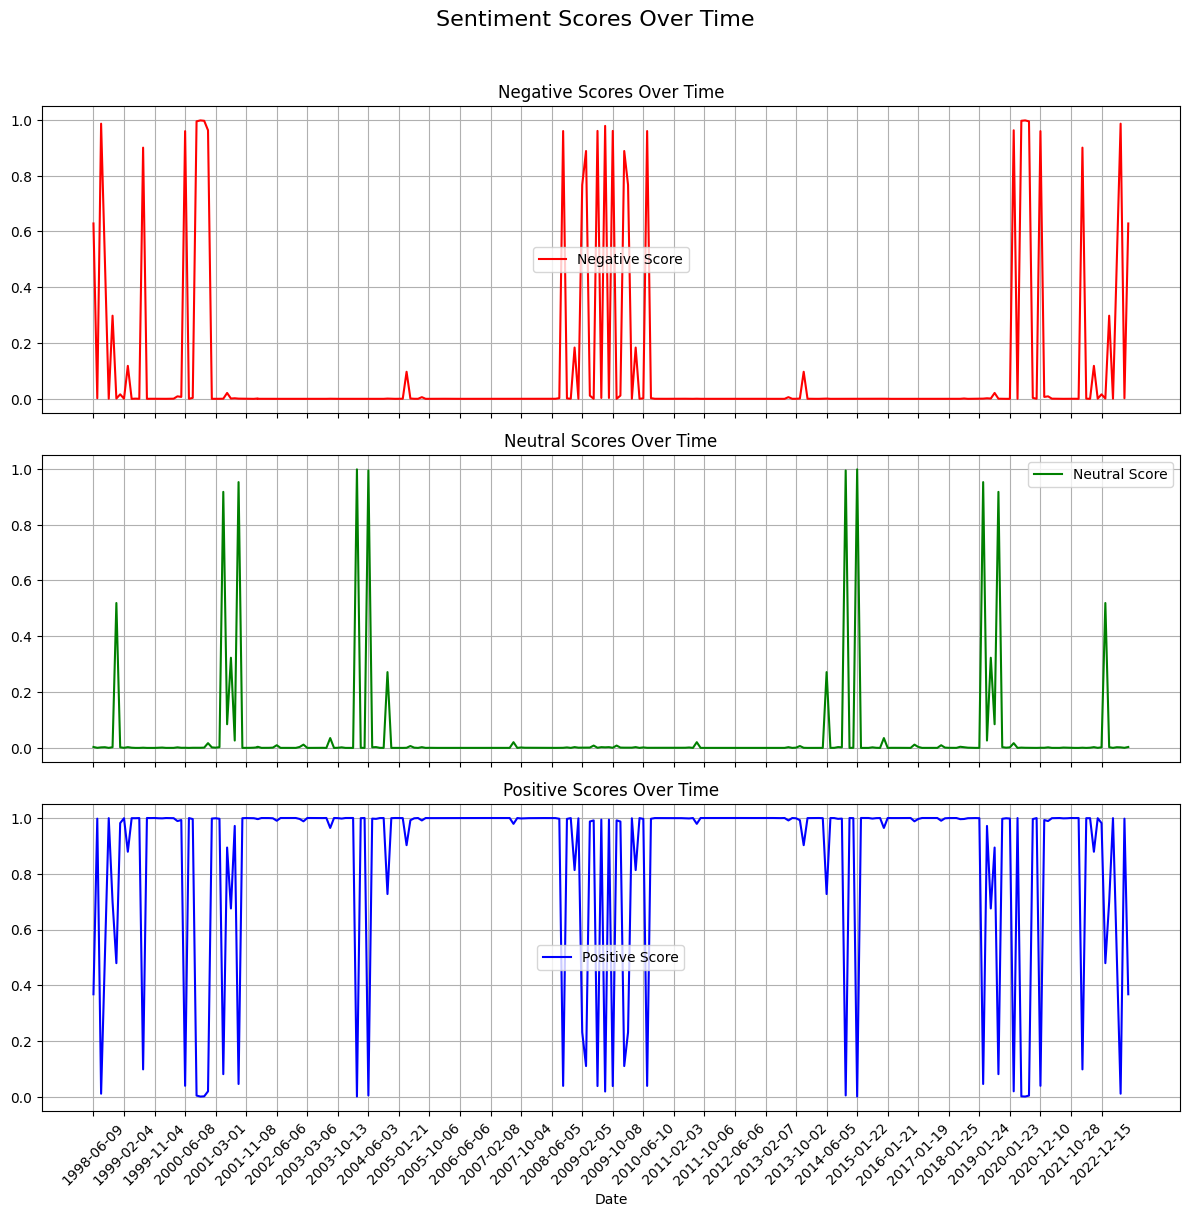

In [27]:
import matplotlib.pyplot as plt

# Assuming df_ecb_sentiment_score is your DataFrame
# Transform columns into lists
negative_scores = df_ecb_sentiment_score['negative_score'].tolist()
neutral_scores = df_ecb_sentiment_score['neutral_score'].tolist()
positive_scores = df_ecb_sentiment_score['positive_score'].tolist()

# Create a list of indices (assuming the DataFrame index is suitable)
date = df_ecb_sentiment_score['Date'].tolist()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

# Plot negative scores
axs[0].plot(date, negative_scores, label='Negative Score', color='r')
axs[0].set_title('Negative Scores Over Time')
axs[0].legend()
axs[0].grid(True)

# Plot neutral scores
axs[1].plot(date, neutral_scores, label='Neutral Score', color='g')
axs[1].set_title('Neutral Scores Over Time')
axs[1].legend()
axs[1].grid(True)

# Plot positive scores
axs[2].plot(date, positive_scores, label='Positive Score', color='b')
axs[2].set_title('Positive Scores Over Time')
axs[2].legend()
axs[2].grid(True)

# Set common labels
fig.suptitle('Sentiment Scores Over Time', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.96])  # Adjust layout to accommodate suptitle

# Rotate x-axis labels by 45 degrees and display every third date
for ax in axs:
    ax.set_xticks(ax.get_xticks()[::2])  # Display every third tick
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')

# Display the plot
plt.show()
